In [1]:
!pip install featuretools

In [81]:
import featuretools as ft
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3> DATA CLEANING </h3>


In [149]:
dataset = pd.read_csv('../Data/loan.csv',low_memory=False)

In [150]:
dataset.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [151]:
dataset.isna().sum()
columns_with_most_nulls = []
columns_with_data=[]
for key,null_value in (dataset.isnull().sum()/len(dataset)*100).sort_values().iteritems():
    if null_value > 75:
        columns_with_most_nulls.append(key)
    else:
        columns_with_data.append(key)
print("No of columns with more than 50% missing data: ",columns_with_most_nulls)
print("No of columns with considerable amount of data: ",columns_with_data)

No of columns with more than 50% missing data:  ['mths_since_last_major_derog', 'mths_since_last_record', 'desc', 'inq_last_12m', 'inq_fi', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'total_cu_tl', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'mths_since_rcnt_il', 'il_util', 'annual_inc_joint', 'verification_status_joint', 'dti_joint']
No of columns with considerable amount of data:  ['id', 'addr_state', 'dti', 'revol_bal', 'initial_list_status', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code', 'application_type', 'zip_code', 'purpose', 'out_prncp', 'funded_amnt', 'pymnt_plan', 'member_id', 'loan_status', 'issue_d', 'verification_status', 'loan_amnt', 'url', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'acc_now_delinq', 'delinq_2yrs', 'pub_rec', 'op

In [152]:
dataset_columns_with_data = dataset[columns_with_data]

In [153]:
dataset_columns_with_data.isna().sum()

id                                 0
addr_state                         0
dti                                0
revol_bal                          0
initial_list_status                0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
policy_code                        0
application_type                   0
zip_code                           0
purpose                            0
out_prncp                          0
funded_amnt                        0
pymnt_plan                         0
member_id                          0
loan_status                        0
issue_d                            0
verification_status                0
loan_amnt                          0
url                                0
f

<h4>Droping unwanted features</h4>
1.we are droping features like "next_pymnt_d","last_pymnt_d","tot_coll_amt","tot_cur_bal" that will generate after a loan is started, so they have no effect on prediction of interest rates <br>
2.we are also dropping "emp_title" feature since borrowers economic strength is collectively dependent on annual income and employment length


In [154]:
dataset_columns_with_data.drop(columns=["last_pymnt_d","emp_title","tot_coll_amt","tot_cur_bal","next_pymnt_d"],inplace=True)

In [155]:
dataset_columns_with_data

,id,addr_state,dti,revol_bal,initial_list_status,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,inq_last_6mths,total_acc,earliest_cr_line,last_credit_pull_d,collections_12_mths_ex_med,title,revol_util,emp_length,total_rev_hi_lim,mths_since_last_delinq
0,1077501,AZ,27.65,13648.0,f,0.00,5861.071414,5831.78,5000.00,861.07,...,1.0,9.0,Jan-1985,Jan-2016,0.0,Computer,83.70,10+ years,NaN,NaN
1,1077430,GA,1.00,1687.0,f,0.00,1008.710000,1008.71,456.46,435.17,...,5.0,4.0,Apr-1999,Sep-2013,0.0,bike,9.40,< 1 year,NaN,NaN
2,1077175,IL,8.72,2956.0,f,0.00,3003.653644,3003.65,2400.00,603.65,...,2.0,10.0,Nov-2001,Jan-2016,0.0,real estate business,98.50,10+ years,NaN,NaN
3,1076863,CA,20.00,5598.0,f,0.00,12226.302212,12226.30,10000.00,2209.33,...,1.0,37.0,Feb-1996,Jan-2015,0.0,personel,21.00,10+ years,NaN,35.0
4,1075358,OR,17.94,27783.0,f,766.90,3242.170000,3242.17,2233.10,1009.07,...,0.0,38.0,Jan-1996,Jan-2016,0.0,Personal,53.90,1 year,NaN,38.0
5,1075269,AZ,11.20,7963.0,f,0.00,5631.377753,5631.38,5000.00,631.38,...,3.0,12.0,Nov-2004,Sep-2015,0.0,My wedding loan I promise to pay back,28.30,3 years,NaN,NaN
6,1069639,NC,23.51,17726.0,f,1889.15,8136.840000,8136.84,5110.85,3025.99,...,1.0,11.0,Jul-2005,Jan-2016,0.0,Loan,85.60,8 years,NaN,NaN
7,1072053,CA,5.35,8221.0,f,0.00,3938.144334,3938.14,3000.00,938.14,...,2.0,4.0,Jan-2007,Dec-2014,0.0,Car Downpayment,87.50,9 years,NaN,NaN
8,1071795,CA,5.55,5210.0,f,0.00,646.020000,646.02,162.02,294.94,...,2.0,13.0,Apr-2004,Aug-2012,0.0,Expand Business & Buy Debt Portfolio,32.60,4 years,NaN,NaN
9,1071570,TX,18.08,9279.0,f,0.00,1476.190000,1469.34,673.48,533.42,...,0.0,3.0,Sep-2004,Mar-2013,0.0,Building my credit history.,36.50,< 1 year,NaN,NaN


In [156]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])

In [157]:
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [158]:
dataset_columns_with_data[numerical_features].isna().sum()

id                                 0
dti                                0
revol_bal                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
policy_code                        0
out_prncp                          0
funded_amnt                        0
member_id                          0
loan_amnt                          0
funded_amnt_inv                    0
int_rate                           0
installment                        0
annual_inc                         4
acc_now_delinq                    29
delinq_2yrs                       29
pub_rec                           29
open_acc                          29
inq_last_6mths                    29
total_acc                         29
c

<h3>Handling Missing numerical data</h3>

In [159]:
#records which do not have column data like "annual_inc","acc_now_delinq","pub_rec","open_acc","inq_last_6mths","total_acc","collections_12_mths_ex_med","revol_util" are very less in number, so we will remove those records
dataset_columns_with_data.dropna(axis=0,subset=["annual_inc","acc_now_delinq","pub_rec","open_acc","inq_last_6mths","total_acc","collections_12_mths_ex_med","revol_util"],inplace=True)

In [161]:
dataset_columns_with_data[["total_rev_hi_lim","mths_since_last_delinq"]].describe()

,total_rev_hi_lim,mths_since_last_delinq
count,8.167220e+05,432682.000000
mean,3.207709e+04,34.073953
std,3.749254e+04,21.883753
min,0.000000e+00,0.000000
25%,1.400000e+04,15.000000
50%,2.370000e+04,31.000000
75%,3.980000e+04,50.000000
max,9.999999e+06,188.000000


In [162]:
dataset_columns_with_data[numerical_features].corr()

,id,dti,revol_bal,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,acc_now_delinq,delinq_2yrs,pub_rec,open_acc,inq_last_6mths,total_acc,collections_12_mths_ex_med,revol_util,total_rev_hi_lim,mths_since_last_delinq
id,1.000000,0.067609,0.036407,0.558553,-0.597574,-0.593161,-0.556603,-0.462330,-0.075830,-0.114402,...,0.016873,0.049649,0.080084,0.088483,-0.126782,0.031270,0.051314,-0.055253,0.048735,-0.008941
dti,0.067609,1.000000,0.067299,0.059174,-0.041556,-0.040416,-0.052080,0.008347,-0.005647,0.001176,...,0.003226,-0.002828,-0.022981,0.144126,-0.008045,0.107946,-0.000295,0.087817,0.032915,0.001311
revol_bal,0.036407,0.067299,1.000000,0.232198,0.138294,0.137734,0.120160,0.137446,0.002929,0.010814,...,-0.000837,-0.032436,-0.100734,0.224578,-0.017529,0.189163,-0.022871,0.216249,0.821106,-0.026911
out_prncp_inv,0.558553,0.059174,0.232198,1.000000,-0.287098,-0.283656,-0.369736,0.112341,-0.032992,-0.110897,...,0.012351,0.031652,-0.007759,0.171682,-0.106685,0.137854,0.016065,0.074432,0.222650,-0.036984
total_pymnt,-0.597574,-0.041556,0.138294,-0.287098,1.000000,0.997648,0.970042,0.681670,0.056297,0.038410,...,-0.008480,-0.031825,-0.087913,0.042601,0.077795,0.109078,-0.039016,0.081857,0.119391,-0.007602
total_pymnt_inv,-0.593161,-0.040416,0.137734,-0.283656,0.997648,1.000000,0.967557,0.680970,0.053453,0.037012,...,-0.008241,-0.031389,-0.087157,0.043807,0.074074,0.110020,-0.038666,0.083070,0.119400,-0.005375
total_rec_prncp,-0.556603,-0.052080,0.120160,-0.369736,0.970042,0.967557,1.000000,0.489336,0.033109,-0.037703,...,-0.010821,-0.038312,-0.084531,0.031151,0.062470,0.099947,-0.038149,0.037444,0.118184,0.000561
total_rec_int,-0.462330,0.008347,0.137446,0.112341,0.681670,0.680970,0.489336,1.000000,0.090439,0.067842,...,0.002212,0.001696,-0.060109,0.061240,0.085738,0.091896,-0.024996,0.183473,0.072075,-0.028363
total_rec_late_fee,-0.075830,-0.005647,0.002929,-0.032992,0.056297,0.053453,0.033109,0.090439,1.000000,0.073675,...,0.003148,0.017327,-0.011424,-0.009440,0.031302,-0.004812,-0.003060,0.022192,-0.005200,-0.021045
recoveries,-0.114402,0.001176,0.010814,-0.110897,0.038410,0.037012,-0.037703,0.067842,0.073675,1.000000,...,0.000721,-0.000716,-0.014480,0.001590,0.045586,0.009396,-0.004787,0.028560,0.000014,-0.004543


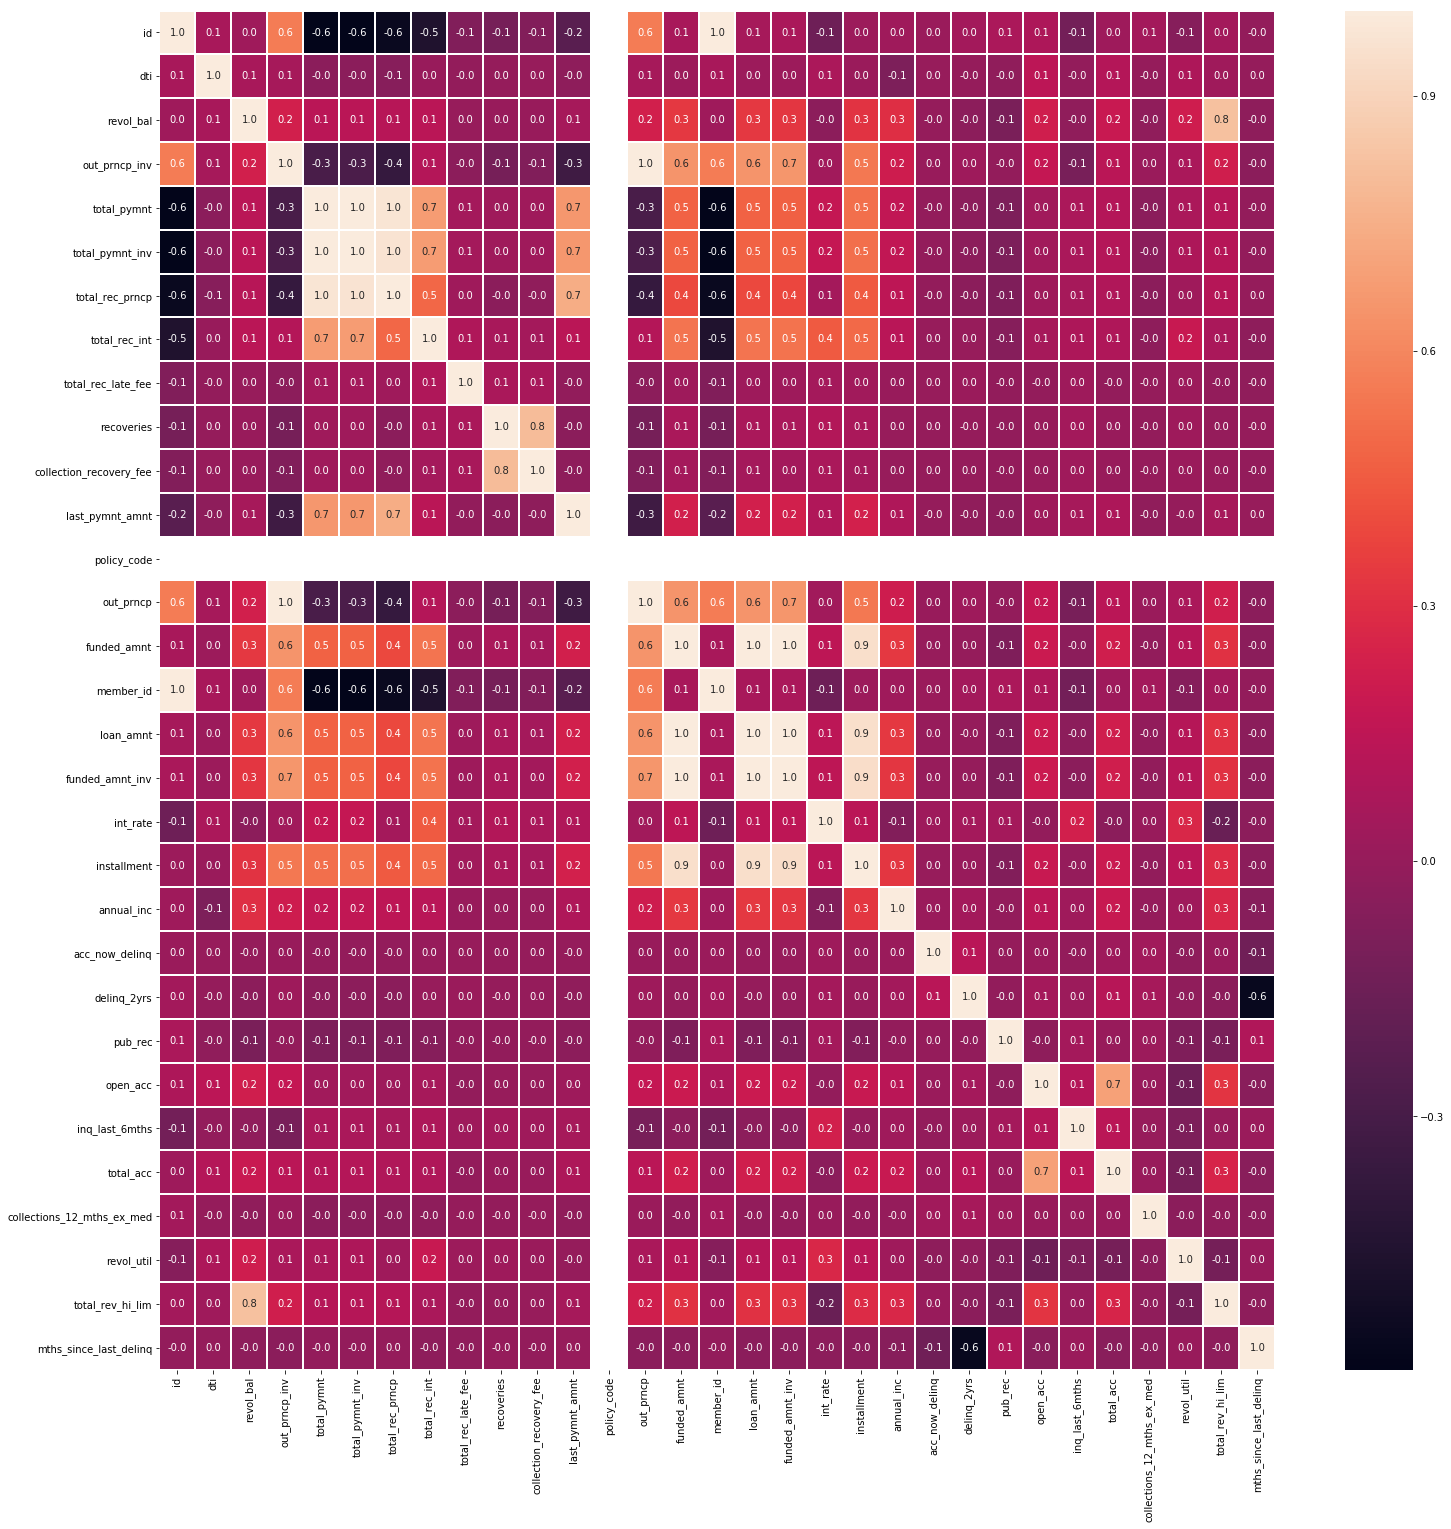

In [163]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(dataset_columns_with_data[numerical_features].corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()


<h4>Removing highly collinear features</h4>


In [164]:
highly_collinear_features=["total_pymnt_inv","total_rec_prncp","funded_amnt_inv","funded_amnt"]

In [165]:
dataset_columns_with_data.drop(columns=highly_collinear_features,inplace=True)

Removing non ordinal features

In [167]:
dataset_columns_with_data.drop(columns=["id"],inplace=True)

In [168]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [169]:
print(len(numerical_features),len(categorical_features))

26 18


In [170]:
dataset_columns_with_data.corr()['int_rate'].sort_values(ascending=False)

int_rate                      1.000000
total_rec_int                 0.445767
revol_util                    0.269090
inq_last_6mths                0.227977
total_pymnt                   0.170555
loan_amnt                     0.145040
installment                   0.133064
recoveries                    0.106830
last_pymnt_amnt               0.101188
dti                           0.079950
collection_recovery_fee       0.070885
total_rec_late_fee            0.057131
delinq_2yrs                   0.055111
pub_rec                       0.052226
out_prncp                     0.042668
out_prncp_inv                 0.042525
acc_now_delinq                0.026480
collections_12_mths_ex_med    0.013360
open_acc                     -0.010047
mths_since_last_delinq       -0.030126
revol_bal                    -0.035604
total_acc                    -0.038554
annual_inc                   -0.072848
member_id                    -0.142296
total_rev_hi_lim             -0.166055
policy_code              

In [171]:
dataset_columns_with_data.isna().sum()

addr_state                         0
dti                                0
revol_bal                          0
initial_list_status                0
out_prncp_inv                      0
total_pymnt                        0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
policy_code                        0
application_type                   0
zip_code                           0
purpose                            0
out_prncp                          0
pymnt_plan                         0
member_id                          0
loan_status                        0
issue_d                            0
verification_status                0
loan_amnt                          0
url                                0
term                               0
int_rate                           0
installment                        0
grade                              0
s

In [173]:
#removing some more highly collinear features
dataset_columns_with_data.drop(columns=["total_rev_hi_lim","collection_recovery_fee","out_prncp_inv","total_acc","mths_since_last_delinq"],inplace=True)

In [174]:
dataset_columns_with_data.isna().sum()

addr_state                        0
dti                               0
revol_bal                         0
initial_list_status               0
total_pymnt                       0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
last_pymnt_amnt                   0
policy_code                       0
application_type                  0
zip_code                          0
purpose                           0
out_prncp                         0
pymnt_plan                        0
member_id                         0
loan_status                       0
issue_d                           0
verification_status               0
loan_amnt                         0
url                               0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
home_ownership                    0
annual_inc                  

In [176]:
#removing user filled data like title for the loan since we will know the purpose
dataset_columns_with_data.drop(columns=["title"],inplace=True)

In [178]:
dataset_columns_with_data["emp_length"]=dataset_columns_with_data["emp_length"].fillna(0)

In [191]:
dataset_columns_with_data.dropna(axis=0,subset=["last_credit_pull_d"],inplace=True)

In [192]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [193]:
#checking if any data is left unhandled
dataset_columns_with_data.isna().sum()

addr_state                    0
dti                           0
revol_bal                     0
initial_list_status           0
total_pymnt                   0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
last_pymnt_amnt               0
policy_code                   0
application_type              0
zip_code                      0
purpose                       0
out_prncp                     0
pymnt_plan                    0
member_id                     0
loan_status                   0
issue_d                       0
verification_status           0
loan_amnt                     0
url                           0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
acc_now_delinq                0
delinq_2yrs                   0
pub_rec                       0
open_acc

In [196]:
#generating clean data
dataset_columns_with_data.to_csv("../Data/dataclean.csv")

In [195]:
dataset_columns_with_data.shape

(886713, 38)

Handling categorical data

In [200]:
categorical_features

array(['addr_state', 'initial_list_status', 'application_type',
       'zip_code', 'purpose', 'pymnt_plan', 'loan_status', 'issue_d',
       'verification_status', 'url', 'term', 'grade', 'sub_grade',
       'home_ownership', 'earliest_cr_line', 'last_credit_pull_d',
       'emp_length'], dtype=object)

In [201]:
numerical_features

array(['dti', 'revol_bal', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'policy_code', 'out_prncp', 'member_id', 'loan_amnt', 'int_rate',
       'installment', 'annual_inc', 'acc_now_delinq', 'delinq_2yrs',
       'pub_rec', 'open_acc', 'inq_last_6mths',
       'collections_12_mths_ex_med', 'revol_util'], dtype=object)

In [203]:
dataset_columns_with_data[numerical_features].corr()['int_rate'].sort_values(ascending =False)

int_rate                      1.000000
total_rec_int                 0.445779
revol_util                    0.269078
inq_last_6mths                0.227997
total_pymnt                   0.170574
loan_amnt                     0.145056
installment                   0.133079
recoveries                    0.106831
last_pymnt_amnt               0.101195
dti                           0.079944
total_rec_late_fee            0.057132
delinq_2yrs                   0.055102
pub_rec                       0.052217
out_prncp                     0.042668
acc_now_delinq                0.026480
collections_12_mths_ex_med    0.013358
open_acc                     -0.010048
revol_bal                    -0.035604
annual_inc                   -0.072845
member_id                    -0.142316
policy_code                        NaN
Name: int_rate, dtype: float64

In [206]:
#removing installment as it is highly collinear with loan_amount
dataset_columns_with_data.drop(columns=["installment"],inplace=True)

In [210]:
#removing columns member id since it is non ordinal, policy_code as it does not have any correlation with interest rate
dataset_columns_with_data.drop(columns=["member_id","policy_code"],inplace=True)

In [211]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

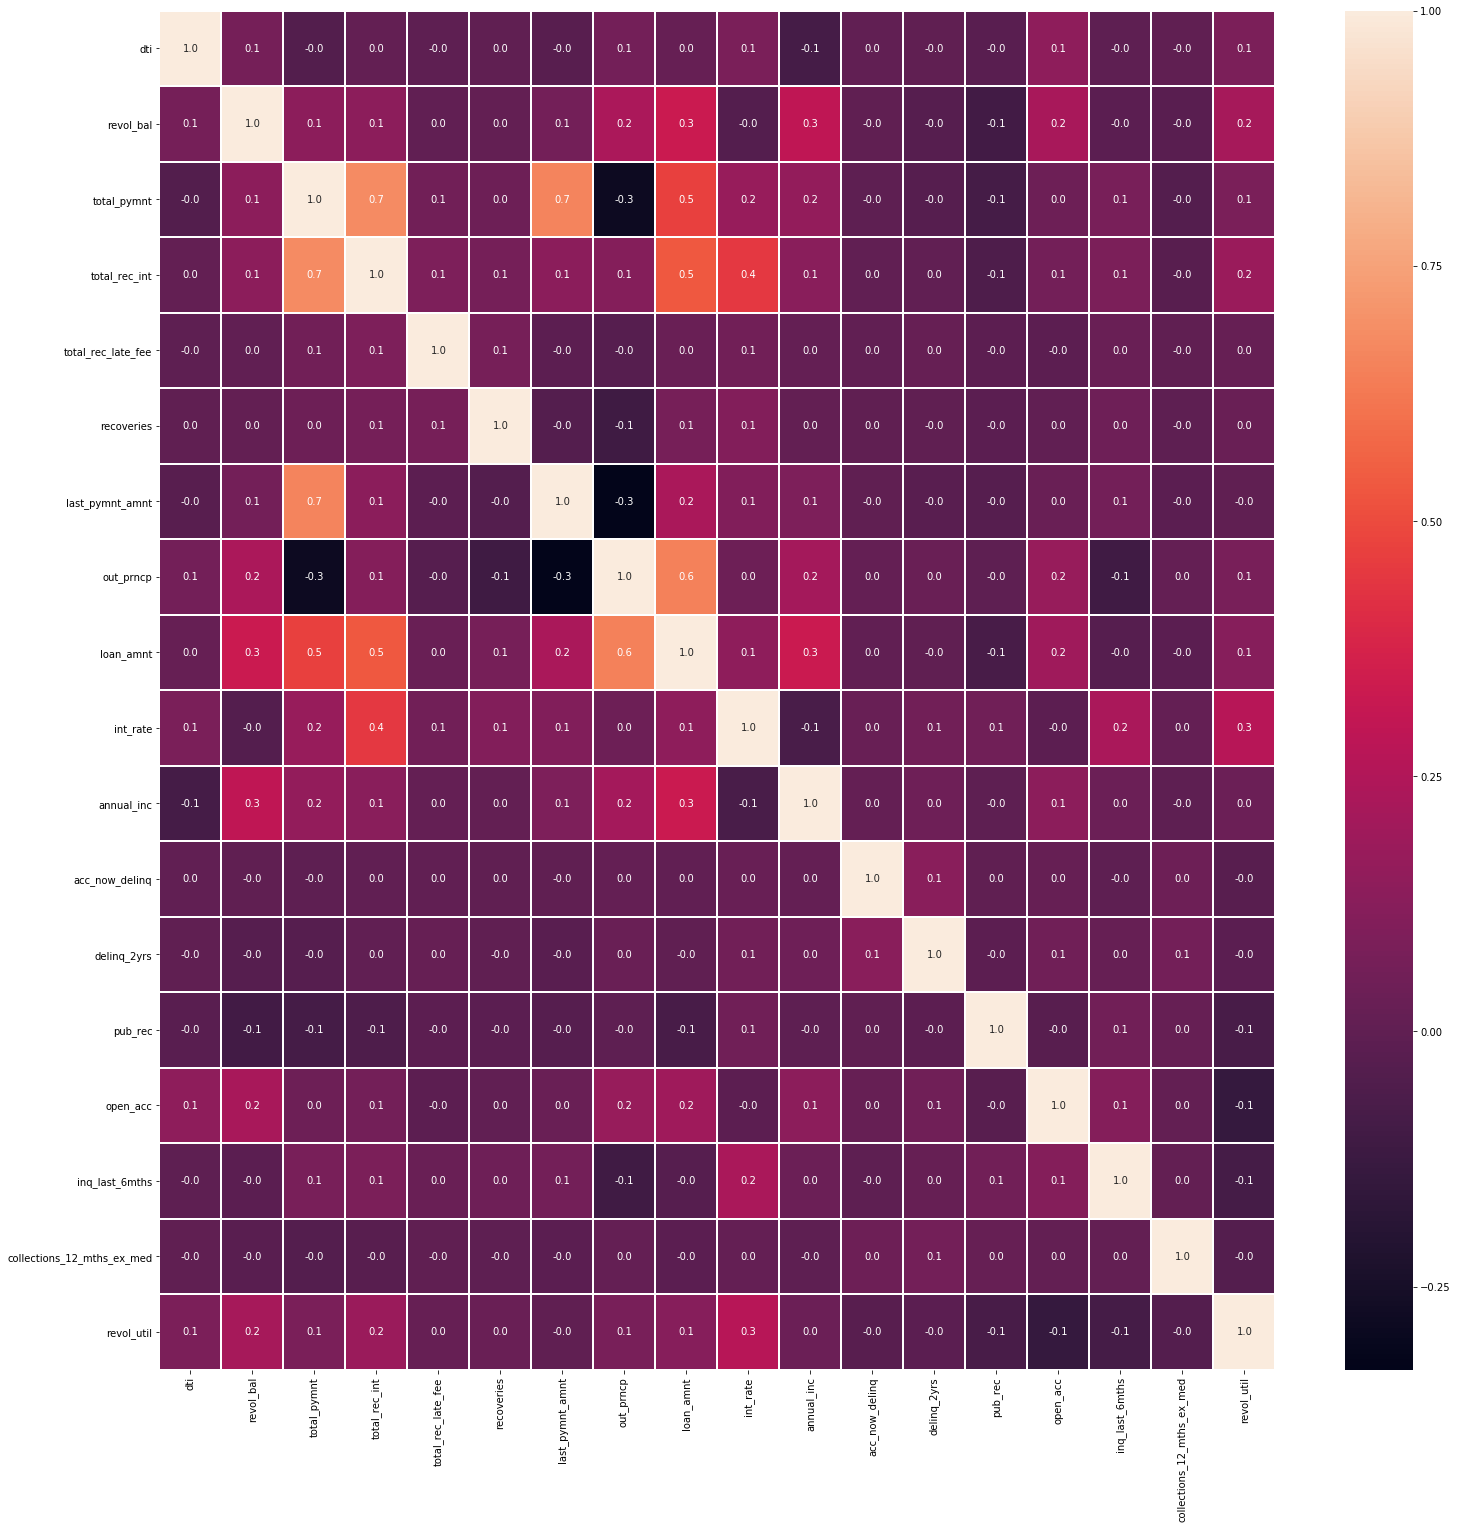

In [216]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(dataset_columns_with_data.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

In [219]:
dataset_columns_with_data.corr()['int_rate'].sort_values(ascending=False)

int_rate                      1.000000
total_rec_int                 0.445779
revol_util                    0.269078
inq_last_6mths                0.227997
total_pymnt                   0.170574
loan_amnt                     0.145056
recoveries                    0.106831
last_pymnt_amnt               0.101195
dti                           0.079944
total_rec_late_fee            0.057132
delinq_2yrs                   0.055102
pub_rec                       0.052217
out_prncp                     0.042668
acc_now_delinq                0.026480
collections_12_mths_ex_med    0.013358
open_acc                     -0.010048
revol_bal                    -0.035604
annual_inc                   -0.072845
Name: int_rate, dtype: float64

<h3>Handling Categorical Data</h3>

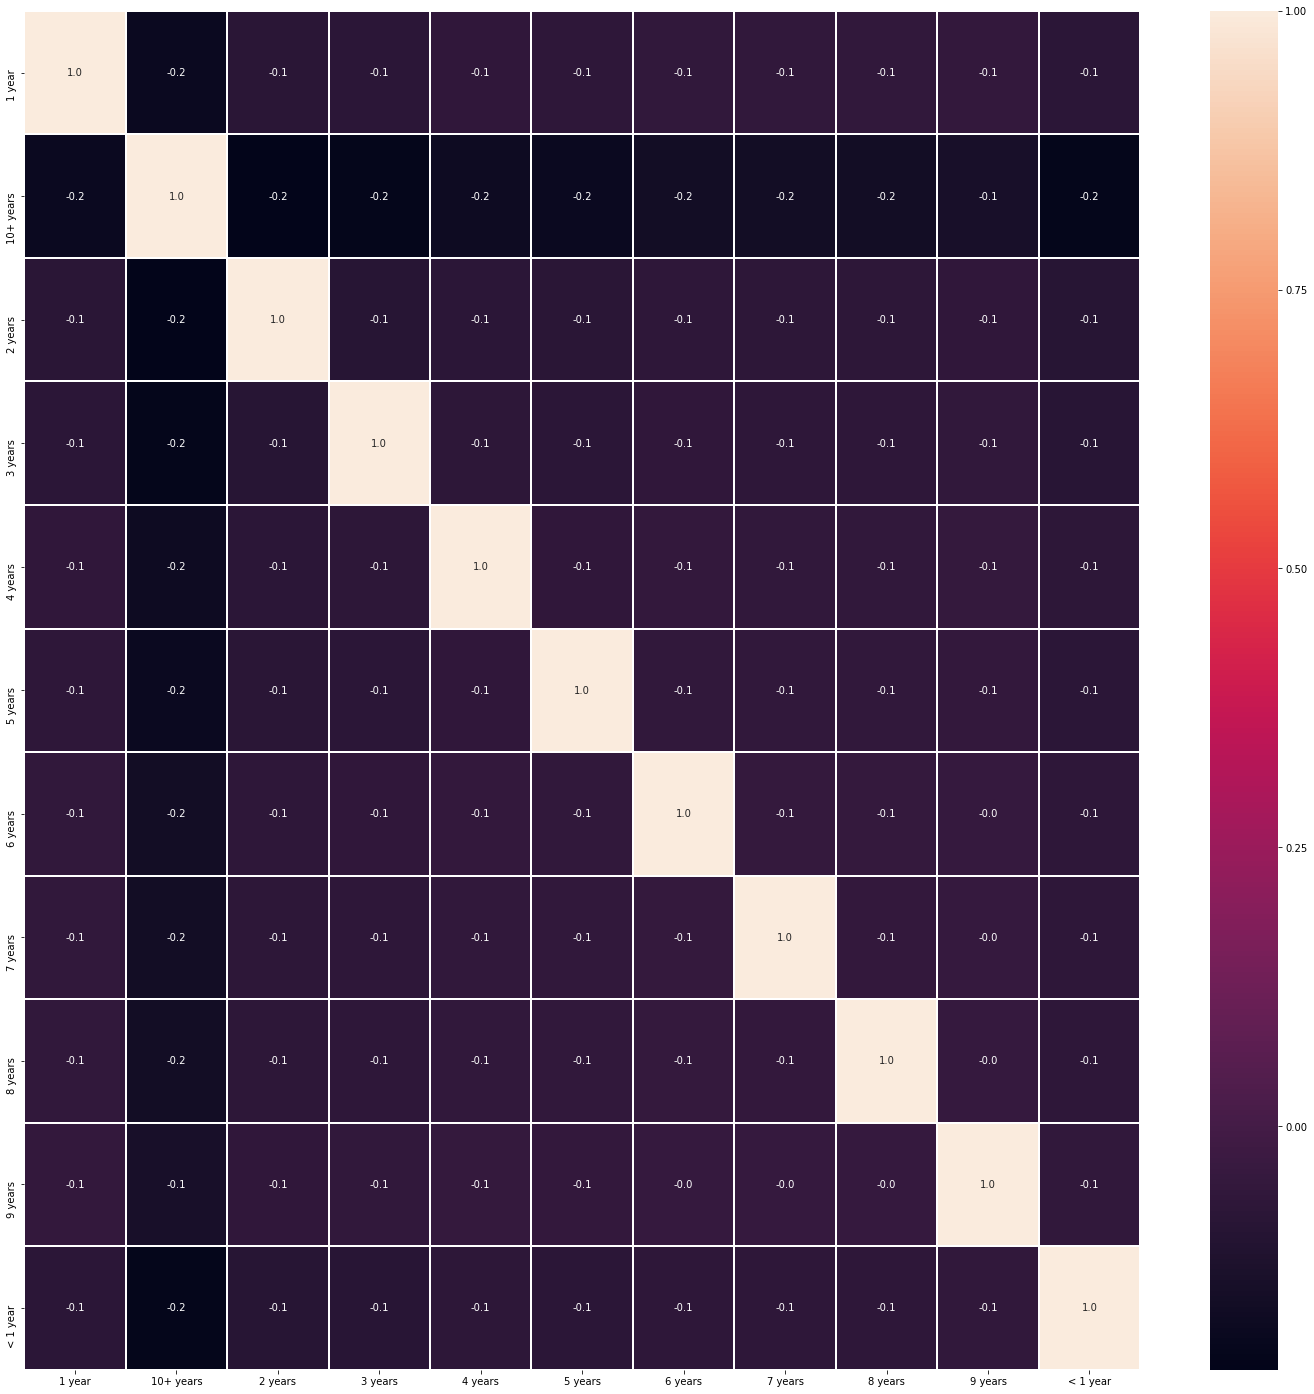

In [227]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(pd.get_dummies(dataset_columns_with_data["emp_length"],drop_first=True).corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()


In [241]:
len(numerical_features)
print(numerical_features)

['dti' 'revol_bal' 'total_pymnt' 'total_rec_int' 'total_rec_late_fee'
 'recoveries' 'last_pymnt_amnt' 'out_prncp' 'loan_amnt' 'int_rate'
 'annual_inc' 'acc_now_delinq' 'delinq_2yrs' 'pub_rec' 'open_acc'
 'inq_last_6mths' 'collections_12_mths_ex_med' 'revol_util']


In [242]:
len(categorical_features)
print(categorical_features)

['addr_state' 'initial_list_status' 'application_type' 'zip_code'
 'purpose' 'pymnt_plan' 'loan_status' 'issue_d' 'verification_status'
 'url' 'term' 'grade' 'sub_grade' 'home_ownership' 'earliest_cr_line'
 'last_credit_pull_d' 'emp_length']


<h3> Handling categorical values </h3>

<ul>Ordinal Values
<li>grade</li>
<li>emp_length</li>
</ul>
<ul>Nominal Values
<li>home_ownership</li>
<li>verification_status</li>
<li>purpose</li>
<li>term</li>
<li>addr_state</li>
</ul>

In [ ]:
# we will remove columns :URL,pymnt_plan, loan_status, zip_code - as these columns hold less significance in intrest rate calculation
dataset_columns_with_data.drop(columns =['url','loan_status','zip_code','pymnt_plan'], inplace=True)

In [254]:
#we noticed that first row's values for both earliest_cr_line and last_credit_pull_d columns contain date values that would require a good amount of feature engineering for them to be potentially useful:
# earliest_cr_line — The month the borrower's earliest reported credit line was opened
# last_credit_pull_d — The most recent month Lending Club pulled credit for this loan
# We'll remove these date columns from the DataFrame.
dataset_columns_with_data.drop(columns =['issue_d','initial_list_status','earliest_cr_line','last_credit_pull_d'], inplace=True)

In [255]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [259]:
print(categorical_features)

['addr_state' 'application_type' 'purpose' 'verification_status' 'term'
 'grade' 'sub_grade' 'home_ownership' 'emp_length']


In [274]:
sub_grades=[]
for key in dataset_columns_with_data.sub_grade.value_counts().to_dict().keys():
    sub_grades.append(key)

In [277]:
sorted(sub_grades)

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

In [284]:
ordinal_features_map = {
   "emp_length": {
       "10+ years": 10,
       "9 years": 9,
       "8 years": 8,
       "7 years": 7,
       "6 years": 6,
       "5 years": 5,
       "4 years": 4,
       "3 years": 3,
       "2 years": 2,
       "1 year": 1,
       "< 1 year": 0,
       "n/a": 0

   },
   "grade":{
       "A": 1,
       "B": 2,
       "C": 3,
       "D": 4,
       "E": 5,
       "F": 6,
       "G": 7
   },
   "sub_grade":{
       'A1':1,
       'A2':2,
       'A3':3,
       'A4':4,
       'A5':5,
       'B1':6,
       'B2':7,
       'B3':8,
       'B4':9,
       'B5':10,
       'C1':11,
       'C2':12,
       'C3':13,
       'C4':14,
       'C5':15,
       'D1':16,
       'D2':17,
       'D3':18,
       'D4':19,
       'D5':20,
       'E1':21,
       'E2':22,
       'E3':23,
       'E4':24,
       'E5':25,
       'F1':26,
       'F2':27,
       'F3':28,
       'F4':29,
       'F5':30,
       'G1':31,
       'G2':32,
       'G3':33,
       'G4':34,
       'G5':35
   }
}
dataset_columns_with_data=dataset_columns_with_data.replace(ordinal_features_map)

In [290]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values
categorical_features=categorical_features.tolist()

In [291]:
categorical_features

['addr_state',
 'application_type',
 'purpose',
 'verification_status',
 'term',
 'home_ownership']

In [295]:
dataset_columns_with_data_copy=dataset_columns_with_data
print(len(dataset_columns_with_data_copy.columns.values),len(dataset_columns_with_data.columns.values))

27 27


In [296]:
def onehotencoder(dataset_columns_with_data,column):
    return dataset_columns_with_data.drop(columns=[column]).join(pd.get_dummies(dataset_columns_with_data[column],drop_first=True))
#replacing nominal categorical features with numeric data using one hot encoding technique
for feature in categorical_features:
    dataset_columns_with_data = onehotencoder(dataset_columns_with_data,feature)

In [297]:
dataset_columns_with_data

,dti,revol_bal,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,out_prncp,loan_amnt,int_rate,...,vacation,wedding,Source Verified,Verified,60 months,MORTGAGE,NONE,OTHER,OWN,RENT
0,27.65,13648.0,5861.071414,861.07,0.00,0.00,171.62,0.00,5000.0,10.65,...,0,0,0,1,0,0,0,0,0,1
1,1.00,1687.0,1008.710000,435.17,0.00,117.08,119.66,0.00,2500.0,15.27,...,0,0,1,0,1,0,0,0,0,1
2,8.72,2956.0,3003.653644,603.65,0.00,0.00,649.91,0.00,2400.0,15.96,...,0,0,0,0,0,0,0,0,0,1
3,20.00,5598.0,12226.302212,2209.33,16.97,0.00,357.48,0.00,10000.0,13.49,...,0,0,1,0,0,0,0,0,0,1
4,17.94,27783.0,3242.170000,1009.07,0.00,0.00,67.79,766.90,3000.0,12.69,...,0,0,1,0,1,0,0,0,0,1
5,11.20,7963.0,5631.377753,631.38,0.00,0.00,161.03,0.00,5000.0,7.90,...,0,1,1,0,0,0,0,0,0,1
6,23.51,17726.0,8136.840000,3025.99,0.00,0.00,170.08,1889.15,7000.0,15.96,...,0,0,0,0,1,0,0,0,0,1
7,5.35,8221.0,3938.144334,938.14,0.00,0.00,111.34,0.00,3000.0,18.64,...,0,0,1,0,0,0,0,0,0,1
8,5.55,5210.0,646.020000,294.94,0.00,189.06,152.39,0.00,5600.0,21.28,...,0,0,1,0,1,0,0,0,1,0
9,18.08,9279.0,1476.190000,533.42,0.00,269.29,121.45,0.00,5375.0,12.69,...,0,0,0,1,1,0,0,0,0,1


<h4>verifying that all columns are numeric are not</h4>

In [309]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float','uint8'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [315]:
print(dataset_columns_with_data.dtypes.to_dict())

{'dti': dtype('float64'), 'revol_bal': dtype('float64'), 'total_pymnt': dtype('float64'), 'total_rec_int': dtype('float64'), 'total_rec_late_fee': dtype('float64'), 'recoveries': dtype('float64'), 'last_pymnt_amnt': dtype('float64'), 'out_prncp': dtype('float64'), 'loan_amnt': dtype('float64'), 'int_rate': dtype('float64'), 'grade': dtype('int64'), 'sub_grade': dtype('int64'), 'annual_inc': dtype('float64'), 'acc_now_delinq': dtype('float64'), 'delinq_2yrs': dtype('float64'), 'pub_rec': dtype('float64'), 'open_acc': dtype('float64'), 'inq_last_6mths': dtype('float64'), 'collections_12_mths_ex_med': dtype('float64'), 'revol_util': dtype('float64'), 'emp_length': dtype('int64'), 'AL': dtype('uint8'), 'AR': dtype('uint8'), 'AZ': dtype('uint8'), 'CA': dtype('uint8'), 'CO': dtype('uint8'), 'CT': dtype('uint8'), 'DC': dtype('uint8'), 'DE': dtype('uint8'), 'FL': dtype('uint8'), 'GA': dtype('uint8'), 'HI': dtype('uint8'), 'IA': dtype('uint8'), 'ID': dtype('uint8'), 'IL': dtype('uint8'), 'IN': 

In [310]:
print('Total number of features after handling categorical data: ',len(dataset_columns_with_data.columns.values))
print("No. of categorical features left:",len(categorical_features))
print("No. of Numerical features left:",len(numerical_features))

Total number of features after handling categorical data:  93
No. of categorical features left: 0
No. of Numerical features left: 93


In [318]:
dictfeatures=dataset_columns_with_data.corr()['int_rate'].sort_values(ascending=False).to_dict()

In [319]:
dictfeatures

{'int_rate': 1.0,
 'sub_grade': 0.9774138265585272,
 'grade': 0.9542282778301797,
 'total_rec_int': 0.44577944941724107,
 ' 60 months': 0.4281278597904553,
 'revol_util': 0.2690783050521046,
 'inq_last_6mths': 0.2279973418205078,
 'Verified': 0.21123764547850013,
 'total_pymnt': 0.1705737745728128,
 'loan_amnt': 0.14505555856281035,
 'recoveries': 0.10683142455710799,
 'last_pymnt_amnt': 0.10119466653787286,
 'debt_consolidation': 0.09736513310599197,
 'other': 0.09130628950453423,
 'dti': 0.07994412136514223,
 'small_business': 0.07419330038931472,
 'RENT': 0.061560544983168625,
 'total_rec_late_fee': 0.05713169964608411,
 'delinq_2yrs': 0.05510224806203673,
 'pub_rec': 0.052216576190761574,
 'moving': 0.04441230833395592,
 'out_prncp': 0.04266835819687199,
 'house': 0.04087411730115664,
 'medical': 0.0294743516963035,
 'acc_now_delinq': 0.02647986349882553,
 'vacation': 0.01822399466394524,
 'collections_12_mths_ex_med': 0.013357984714299834,
 'AL': 0.01316797822715439,
 'renewable_e

In [324]:
final_clean_numeric_features=pd.DataFrame({"correlation with int_rate":dictfeatures})

In [328]:
final_clean_numeric_features.index.name="Feature name"

In [329]:
final_clean_numeric_features.to_csv('../Data/final_clean_numeric_features.csv')

In [327]:
dataset_columns_with_data.to_csv('../Data/dataset_columns_with_data.csv')

In [330]:
dataset_columns_with_data.describe()

,dti,revol_bal,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,out_prncp,loan_amnt,int_rate,...,vacation,wedding,Source Verified,Verified,60 months,MORTGAGE,NONE,OTHER,OWN,RENT
count,886713.000000,8.867130e+05,886713.000000,886713.000000,886713.000000,886713.000000,886713.000000,886713.000000,886713.000000,886713.000000,...,886713.000000,886713.000000,886713.000000,886713.00000,886713.000000,886713.000000,886713.000000,886713.000000,886713.000000,886713.000000
mean,18.160590,1.692467e+04,7559.273766,1755.001637,0.395571,45.903508,2164.303781,8405.920818,14758.062755,13.245973,...,0.005326,0.002643,0.371458,0.32804,0.300128,0.499879,0.000050,0.000203,0.098554,0.401311
std,17.194998,2.241267e+04,7871.557404,2095.479058,4.082276,409.677977,4794.738016,8493.410411,8434.244175,4.381777,...,0.072788,0.051347,0.483195,0.46950,0.458313,0.500000,0.007044,0.014246,0.298062,0.490164
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,5.320000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.910000,6.451000e+03,1914.530000,441.530000,0.000000,0.000000,280.210000,0.000000,8000.000000,9.990000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.660000,1.188000e+04,4895.120000,1073.570000,0.000000,0.000000,462.840000,6466.100000,13000.000000,12.990000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.950000,2.083400e+04,10618.140000,2238.590000,0.000000,0.000000,831.230000,13660.920000,20000.000000,16.200000,...,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,9999.000000,2.904836e+06,57777.579870,24205.620000,358.680000,33520.270000,36475.590000,49372.860000,35000.000000,28.990000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [411]:
dataset_columns_with_data_copy1 =dataset_columns_with_data

In [357]:
dataset_columns_with_data.shape

(886713, 93)

In [466]:
Q1, Q3= np.percentile(dataset_columns_with_data_copy1[numerical_data_outlierslist],[25,75])
IQR = Q3 - Q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [467]:
lower_bound

-1571.19

In [460]:
dataset_columns_with_data_out = (dataset_columns_with_data_copy1[numerical_data_outlierslist] < (q1 - 1.5 * iqr)) |(dataset_columns_with_data_copy1[numerical_data_outlierslist] > (q3 + 1.5 * iqr))

In [470]:
dataset_columns_with_data_out.describe()

,dti,revol_bal,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,out_prncp,loan_amnt,int_rate,...,sub_grade,annual_inc,acc_now_delinq,delinq_2yrs,pub_rec,open_acc,inq_last_6mths,collections_12_mths_ex_med,revol_util,emp_length
count,886713,886713,886713,886713,886713,886713,886713,886713,886713,886713,...,886713,886713,886713,886713,886713,886713,886713,886713,886713,886713
unique,2,2,2,2,1,2,2,2,2,1,...,1,2,1,1,1,1,1,1,1,1
top,False,True,True,False,False,False,False,True,True,False,...,False,True,False,False,False,False,False,False,False,False
freq,886711,826179,600700,707210,886713,881639,742530,577122,863926,886713,...,886713,886707,886713,886713,886713,886713,886713,886713,886713,886713


In [468]:
dataset_columns_with_data_copy2 = dataset_columns_with_data_copy1[~((dataset_columns_with_data_copy1[numerical_data_outlierslist] < (Q1 - 1.5 * IQR)) |(dataset_columns_with_data_copy1[numerical_data_outlierslist] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [469]:
dataset_columns_with_data_copy2

,dti,revol_bal,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,out_prncp,loan_amnt,int_rate,...,vacation,wedding,Source Verified,Verified,60 months,MORTGAGE,NONE,OTHER,OWN,RENT
42362,0.00,0.0,83.88,14.44,0.0,20.4,15.90,0.0,500.0,9.01,...,0,0,0,0,0,0,0,0,0,1
42437,18.99,702.0,2173.19,373.19,0.0,0.0,1080.38,0.0,1800.0,17.22,...,0,0,0,0,0,0,0,0,0,1


In [352]:
dataset_columns_with_data_copy1=dataset_columns_with_data_copy1.loc[~(dataset_columns_with_data_out),:]

In [414]:
dataset_columns_with_data_copy1.shape

(886713, 93)

In [415]:
numerical_data_outliers = dataset_columns_with_data.select_dtypes(include = ['int64','float'])

In [416]:
numerical_data_outlierslist=numerical_data_outliers.columns.values.tolist()

In [430]:
dataset_columns_with_data_out.shape

(886713, 21)

In [439]:
dataset_columns_with_data_out_copy1 = dataset_columns_with_data_out[(dataset_columns_with_data_out != True).any(axis=1)]

In [449]:

out = dataset_columns_with_data_out.replace({'True': np.nan}).dropna().astype(float)

TypeError: replace() takes at least 2 arguments (1 given)

In [444]:
out

,dti,revol_bal,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,out_prncp,loan_amnt,int_rate,...,sub_grade,annual_inc,acc_now_delinq,delinq_2yrs,pub_rec,open_acc,inq_last_6mths,collections_12_mths_ex_med,revol_util,emp_length
42362,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42437,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [363]:
q1, q3= np.percentile(dataset_columns_with_data_copy1[numerical_data_outliers],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
dataset_columns_with_data_out = (dataset_columns_with_data_copy1[numerical_data_outliers] < (q1 - 1.5 * iqr)) |(dataset_columns_with_data_copy1[numerical_data_outliers] > (q3 + 1.5 * iqr))

In [ ]:
dataset_columns_with_data_out.apply()
for each in numerical_data_outliers:
    print(dataset_columns_with_data_out[each].value_counts())